# Data Preparation and Advanced Model Evaluation

## Agenda

**Data preparation**

- Handling missing values
- Handling categorical features (review)

**Advanced model evaluation**

- ROC curves and AUC
- Bonus: ROC curve is only sensitive to rank order of predicted probabilities
- Cross-validation

## Part 1: Handling missing values

scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

In [12]:
# read the Titanic data
import pandas as pd
path = '../data/'
url = path + 'titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.shape

(891, 11)

In [3]:
# check for missing values
print titanic.isnull()
print titanic.isnull().sum()

            Survived Pclass   Name    Sex    Age  SibSp  Parch Ticket   Fare  \
PassengerId                                                                    
1              False  False  False  False  False  False  False  False  False   
2              False  False  False  False  False  False  False  False  False   
3              False  False  False  False  False  False  False  False  False   
4              False  False  False  False  False  False  False  False  False   
5              False  False  False  False  False  False  False  False  False   
6              False  False  False  False   True  False  False  False  False   
7              False  False  False  False  False  False  False  False  False   
8              False  False  False  False  False  False  False  False  False   
9              False  False  False  False  False  False  False  False  False   
10             False  False  False  False  False  False  False  False  False   
11             False  False  False  Fals

In [4]:
titanic.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [5]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

One possible strategy is to **drop missing values**:

In [6]:
# drop rows with any missing values
titanic.dropna().shape

(183, 11)

In [7]:
titanic = titanic.dropna()

In [8]:
titanic.shape

(183, 11)

In [9]:
titanic.dropna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [10]:
titanic.shape

(183, 11)

In [13]:
# drop rows where Age is missing
titanic[titanic.Age.notnull()].shape

(714, 11)

In [14]:
titanic.Age.notnull()

PassengerId
1       True
2       True
3       True
4       True
5       True
6      False
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18     False
19      True
20     False
21      True
22      True
23      True
24      True
25      True
26      True
27     False
28      True
29     False
30     False
       ...  
862     True
863     True
864    False
865     True
866     True
867     True
868     True
869    False
870     True
871     True
872     True
873     True
874     True
875     True
876     True
877     True
878     True
879    False
880     True
881     True
882     True
883     True
884     True
885     True
886     True
887     True
888     True
889    False
890     True
891     True
Name: Age, dtype: bool

Sometimes a better strategy is to **impute missing values**:

In [19]:
# mean Age
titanic.Age.mean()

29.69911764705882

In [20]:
# median Age
titanic.Age.median()

28.0

In [21]:
# most frequent Age
titanic.Age.mode()

0    24.0
dtype: float64

In [22]:
# fill missing values for Age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)
titanic.shape

(891, 11)

Another strategy would be to build a **KNN model** just to impute missing values. How would we do that?

If values are missing from a categorical feature, we could treat the missing values as **another category**. Why might that make sense?

How do we **choose** between all of these strategies?

## Part 2: Handling categorical features (Review)

How do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

In [24]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Create and encode Female feature
titanic['Female'] = titanic.Sex.map({'male':0, 'female':1})

In [16]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
#embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [20]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1


- How do we **interpret** the encoding for Embarked?
- Why didn't we just encode Embarked using a **single feature** (C=0, Q=1, S=2)?
- Does it matter which category we choose to define as the **baseline**?
- Why do we only need **two dummy variables** for Embarked?

In [32]:
# define X and y
feature_cols = ['Pclass', 'Parch', 'Age', 'Female', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.793721973094


## Part 3: ROC curves and AUC

In [33]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[ 0.8452663   0.07440619  0.85128441  0.62514454  0.87717248  0.09601822
  0.13600162  0.90162328  0.61150829  0.62514454  0.08305948  0.54966866
  0.23478322  0.20853976  0.62514454  0.46341462  0.12118504  0.08614169
  0.05523576  0.76867594  0.06415723  0.13692965  0.9627984   0.28176687
  0.77856672  0.07719432  0.96068646  0.67909615  0.22198383  0.93893682
  0.5886885   0.46341462  0.31860851  0.55950062  0.06743822  0.70232278
  0.38579274  0.07440619  0.63947066  0.09952911  0.53979774  0.49567627
  0.83880153  0.30086838  0.54100347  0.05735005  0.1170095   0.1453448
  0.54364654  0.29815334  0.3244294   0.82998152  0.27378207  0.16081473
  0.07171094  0.56928613  0.20204633  0.18844873  0.03227062  0.60781895
  0.48572915  0.12779065  0.1943229   0.30507117  0.47332536  0.62324808
  0.1556944   0.13692965  0.74387473  0.11720014  0.08614169  0.11384458
  0.43467364  0.07440619  0.53806807  0.28063533  0.90162328  0.10629298
  0.32290561  0.9512773   0.08007789  0.06310802  0.

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

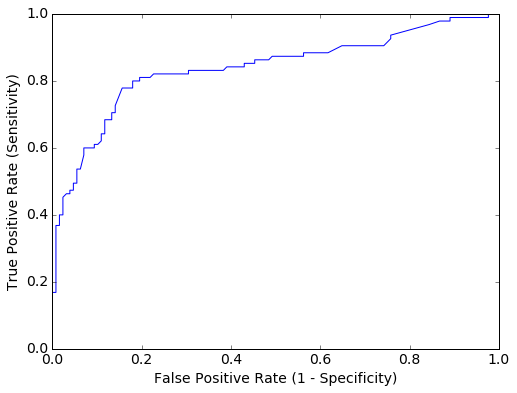

In [35]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#print(metrics.roc_curve(y_test, y_pred_prob))

In [36]:
# calculate AUC
print metrics.roc_auc_score(y_test, y_pred_prob)

0.838692434211


Seeing the ROC curve and calculate AUC allows you to see the quality of the model and in comparison to other models.

Once satisfied with the estimator and parameter choices, you choose the threshold that best **balances sensitivity and specificity** based on the level of need to favor one over the other.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009FF95F8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE4DF28>], dtype=object)

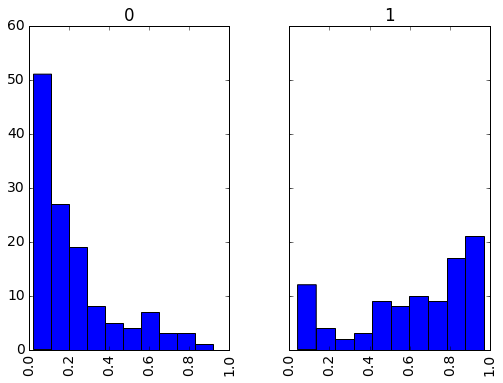

In [37]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

What would have happened if you had used **y_pred_class** instead of **y_pred_prob** when drawing the ROC curve or calculating AUC?

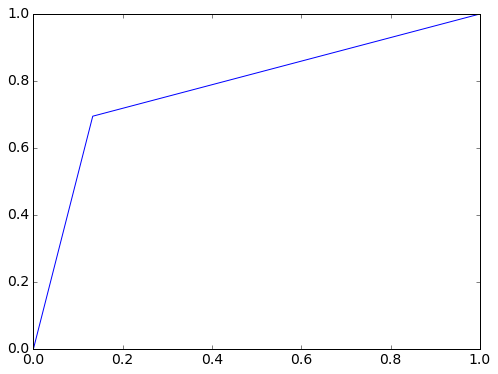

In [38]:
# ROC curve using y_pred_class - WRONG!
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)

In [39]:
# AUC using y_pred_class - WRONG!
print metrics.roc_auc_score(y_test, y_pred_class)

0.780962171053


If you use **y_pred_class**, it will interpret the zeros and ones as predicted probabilities of 0% and 100%.

## Bonus: ROC curve is only sensitive to rank order of predicted probabilities

In [ ]:
# print the first 10 predicted probabilities
y_pred_prob[:10]

In [ ]:
# take the square root of predicted probabilities (to make them all bigger)
import numpy as np
y_pred_prob_new = np.sqrt(y_pred_prob)

# print the modified predicted probabilities
y_pred_prob_new[:10]

In [ ]:
# histogram of predicted probabilities has changed
df = pd.DataFrame({'probability':y_pred_prob_new, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

In [ ]:
# ROC curve did not change
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_new)
plt.plot(fpr, tpr)

In [ ]:
# AUC did not change
print metrics.roc_auc_score(y_test, y_pred_prob_new)

## Part 4: Cross-validation

In [ ]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

In [ ]:
# Evaluate adding other features.  Add Fare to the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Female', 'Embarked_Q', 'Embarked_S', 'Fare']
X = titanic[feature_cols]

# recalculate AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

In [ ]:
#Bonus: Create a hypothetical passenger and make a prediction with the best model
